In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.metrics import mean_squared_error, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

import statsmodels
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import spearmanr, pearsonr
from sklearn.metrics import auc

In [36]:
df = pd.read_csv('/Users/wingkaho/Documents/CASA/QM/QM_self/datasource.csv')

In [37]:
df.columns

Index(['borough_name', 'borough_code', 'borough_area_hectare',
       'green_area_hectare', 'blue _area_hectare', 'green+blue_area_hectare',
       'percent_green', 'percent_blue', 'percent_green+blue', 'healthyweight',
       'overweight', 'happiness', 'anxiety', 'population', 'death_persons',
       'death_males', 'death_females', 'standard_mortality_ratio_persons',
       'standard_mortality_ratio_males', 'standard_mortality_ratio_females',
       'life_expectancy_birth_males', 'life_expectancy_birth_females',
       'life_expectancy_65_males', 'life_expectancy_65_females',
       'DSR_annual_age15+_persons', 'DSR_annual_age15+_males',
       'DSR_annual_age15+_females', 'number_annual_age15+_persons',
       'number_annual_age15+_males', 'number_annual_age15+_females',
       'meanpercent_homes_with_good_access',
       'meanpercent_home_with_deficiency_access',
       'any_neurotic_disorder_per1000', 'all_phobias_per1000',
       'depressive_episode_per1000', 'generalised_anxiety_

In [5]:
df.columns

Index(['borough_area_hectare', 'green_area_hectare', 'blue _area_hectare',
       'green+blue_area_hectare', 'percent_green', 'percent_blue',
       'percent_green+blue', 'happiness', 'anxiety', 'population',
       'death_persons', 'death_males', 'death_females',
       'standard_mortality_ratio_persons', 'standard_mortality_ratio_males',
       'standard_mortality_ratio_females', 'life_expectancy_birth_males',
       'life_expectancy_birth_females', 'life_expectancy_65_males',
       'life_expectancy_65_females', 'DSR_annual_age15+_persons',
       'DSR_annual_age15+_males', 'DSR_annual_age15+_females',
       'number_annual_age15+_persons', 'number_annual_age15+_males',
       'number_annual_age15+_females', 'meanpercent_homes_with_good_access',
       'meanpercent_home_with_deficiency_access',
       'any_neurotic_disorder_per1000', 'all_phobias_per1000',
       'depressive_episode_per1000', 'generalised_anxiety_disorder_per1000',
       'mixed_anxiety_depression', 'obsessive_compu

In [8]:
df1 = df[['percent_green', 'meanpercent_homes_with_good_access', 'life_expectancy_birth_males', 'life_expectancy_birth_females', 'standard_mortality_ratio_persons', 'all_phobias_per1000', 'any_neurotic_disorder_per1000', 'happiness', 'anxiety']]

Text(0.5, 1.0, 'Correlation Matrix')

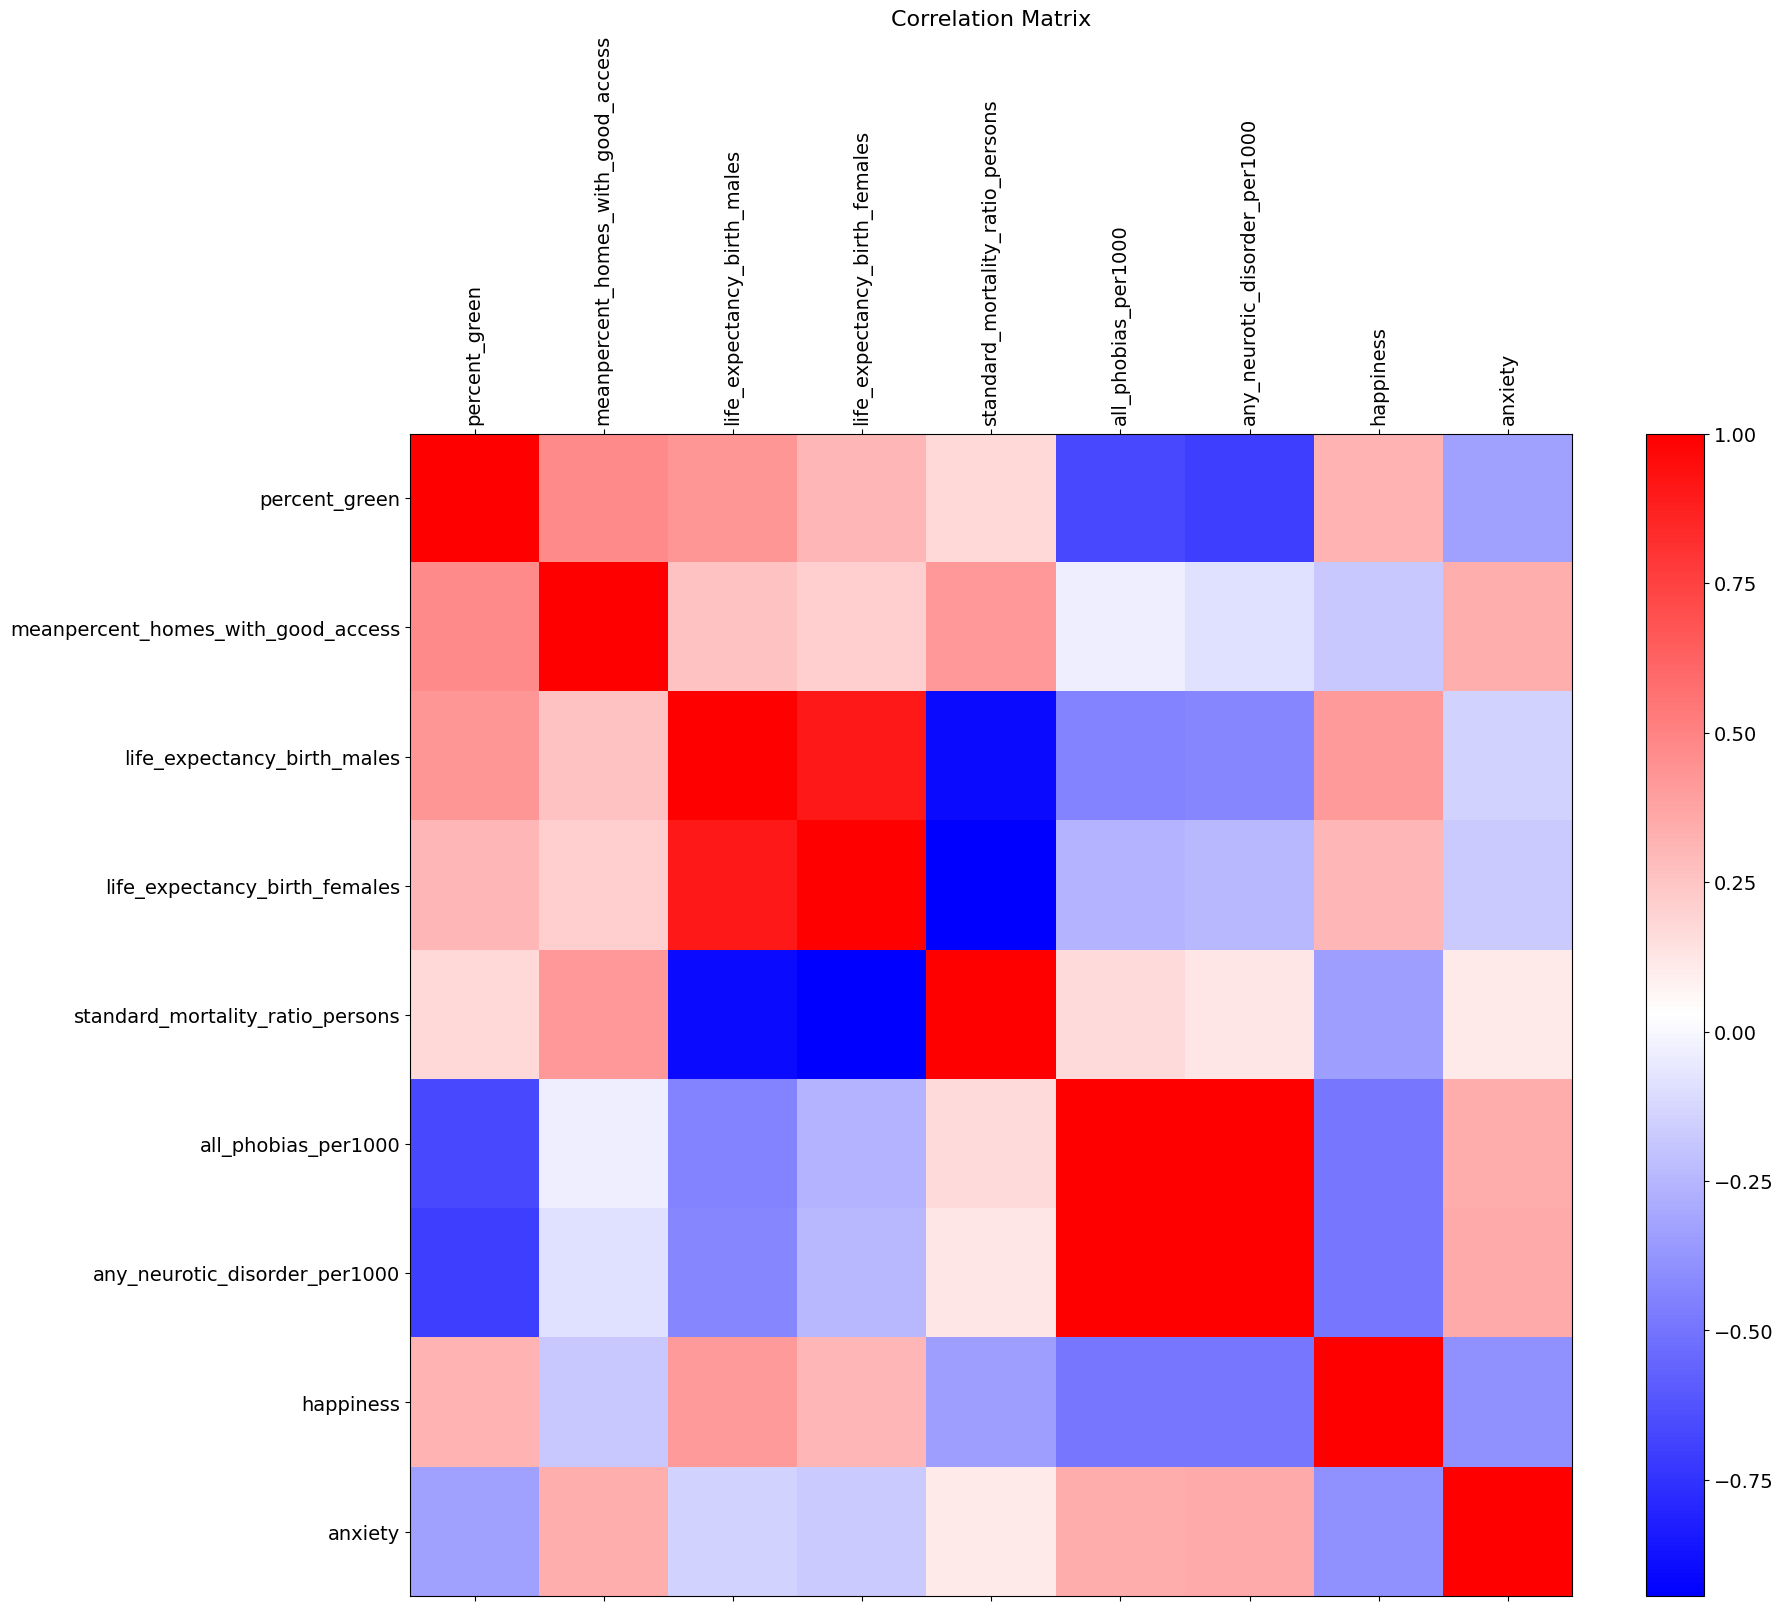

In [9]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df1.corr(), fignum=f.number, cmap="bwr")
plt.xticks(range(df1.shape[1]), df1.columns, fontsize=14, rotation=90)
plt.yticks(range(df1.shape[1]), df1.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

In [ ]:
df.life = df[['life_expectancy_birth_males', 'life_expectancy_birth_females']]

/var/folders/dc/9wj1x7k55tz37v935tbrs1x40000gn/T/ipykernel_95730/292489949.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.life = df[['life_expectancy_birth_males', 'life_expectancy_birth_females']]


In [ ]:
df.life.describe()

,life_expectancy_birth_males,life_expectancy_birth_females
count,32.000000,32.000000
mean,80.171875,84.043750
std,1.369538,1.150578
min,77.500000,81.800000
25%,79.000000,83.325000
50%,80.100000,84.050000
75%,80.925000,84.600000
max,83.400000,86.500000


### Life expectancy

/var/folders/dc/9wj1x7k55tz37v935tbrs1x40000gn/T/ipykernel_95730/1047113491.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["life_expectancy_birth_females"], ax=ax, color="black", shade=True)


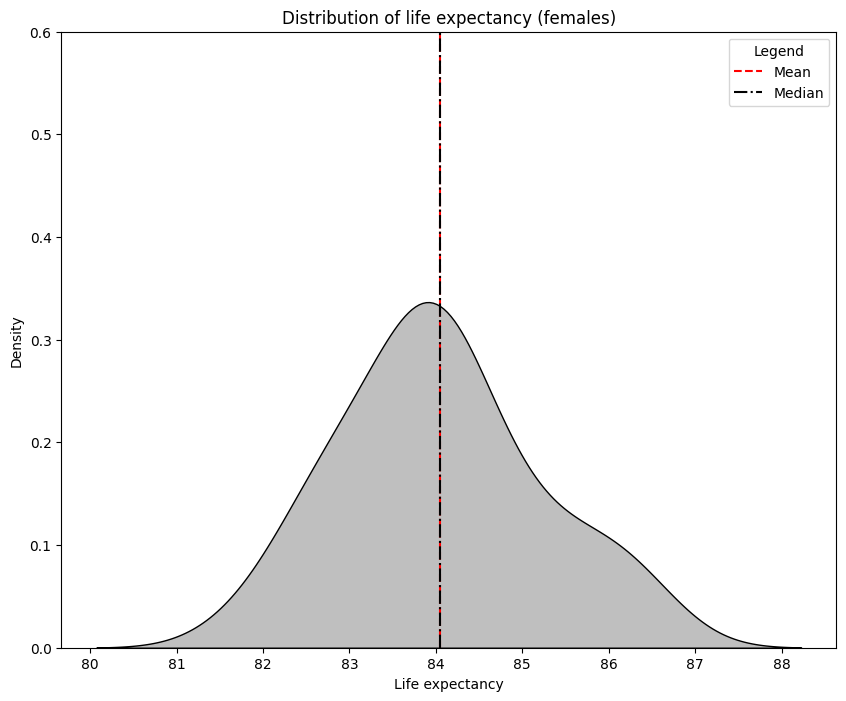

In [ ]:
fig, ax = plt.subplots(1, figsize=(10,8))
sns.kdeplot(df["life_expectancy_birth_females"], ax=ax, color="black", shade=True)
plt.xlabel("Life expectancy")
plt.vlines(df["life_expectancy_birth_females"].mean(), 0, 0.65, linestyle="--", color="red", label="Mean")
plt.vlines(df["life_expectancy_birth_females"].median(), 0, 0.65, linestyle="-.", color="black", label="Median")
plt.legend(title="Legend")
plt.title("Distribution of life expectancy (females)")
plt.ylim(0,0.60)

plt.show()

### Mental health

/var/folders/dc/9wj1x7k55tz37v935tbrs1x40000gn/T/ipykernel_95730/1259965430.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["all_phobias_per1000"], ax=ax, color="black", shade=True)


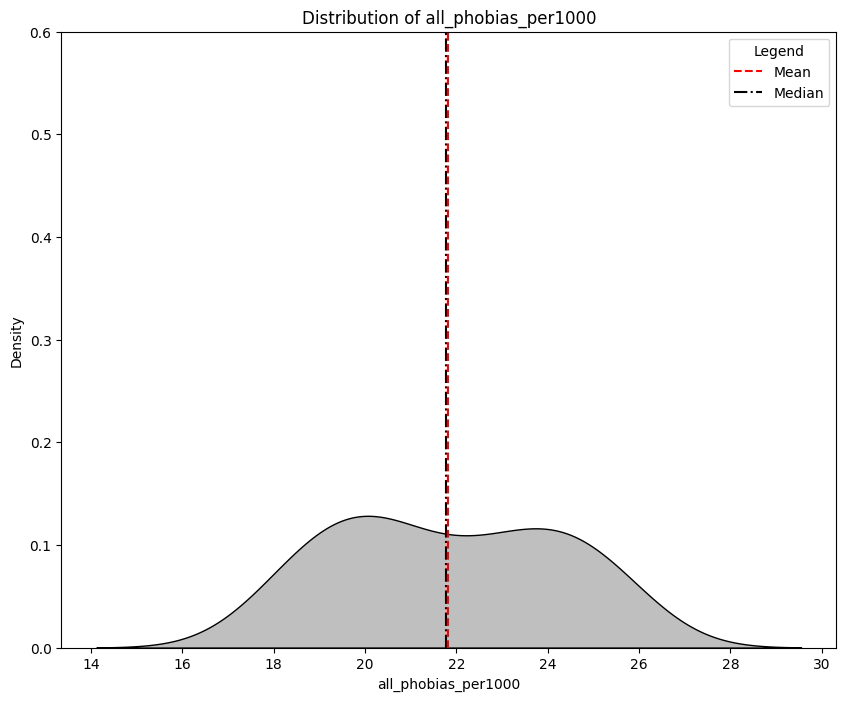

In [ ]:
fig, ax = plt.subplots(1, figsize=(10,8))
sns.kdeplot(df["all_phobias_per1000"], ax=ax, color="black", shade=True)
plt.xlabel("all_phobias_per1000")
plt.vlines(df["all_phobias_per1000"].mean(), 0, 0.65, linestyle="--", color="red", label="Mean")
plt.vlines(df["all_phobias_per1000"].median(), 0, 0.65, linestyle="-.", color="black", label="Median")
plt.legend(title="Legend")
plt.title("Distribution of all_phobias_per1000")
plt.ylim(0,0.60)

plt.show()

### Mortality

/var/folders/dc/9wj1x7k55tz37v935tbrs1x40000gn/T/ipykernel_95730/4157937887.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["standard_mortality_ratio_persons"], ax=ax, color="black", shade=True)


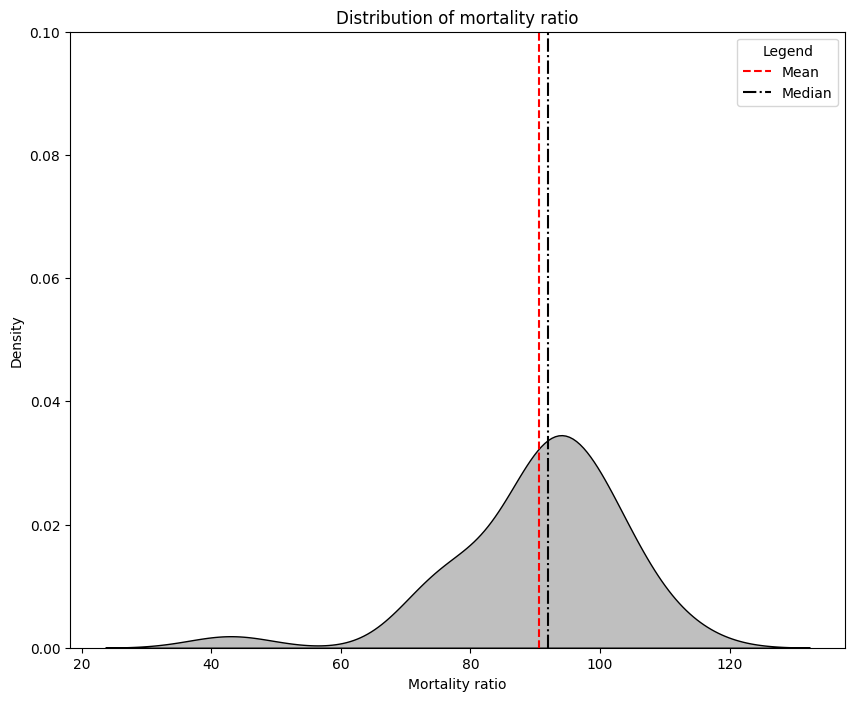

In [ ]:
fig, ax = plt.subplots(1, figsize=(10,8))
sns.kdeplot(df["standard_mortality_ratio_persons"], ax=ax, color="black", shade=True)
plt.xlabel("Mortality ratio")
plt.vlines(df["standard_mortality_ratio_persons"].mean(), 0, 0.65, linestyle="--", color="red", label="Mean")
plt.vlines(df["standard_mortality_ratio_persons"].median(), 0, 0.65, linestyle="-.", color="black", label="Median")
plt.legend(title="Legend")
plt.title("Distribution of mortality ratio")
plt.ylim(0,0.10)

plt.show()

### Accessibility

/var/folders/dc/9wj1x7k55tz37v935tbrs1x40000gn/T/ipykernel_95730/2218906604.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["meanpercent_homes_with_good_access"], ax=ax, color="black", shade=True)


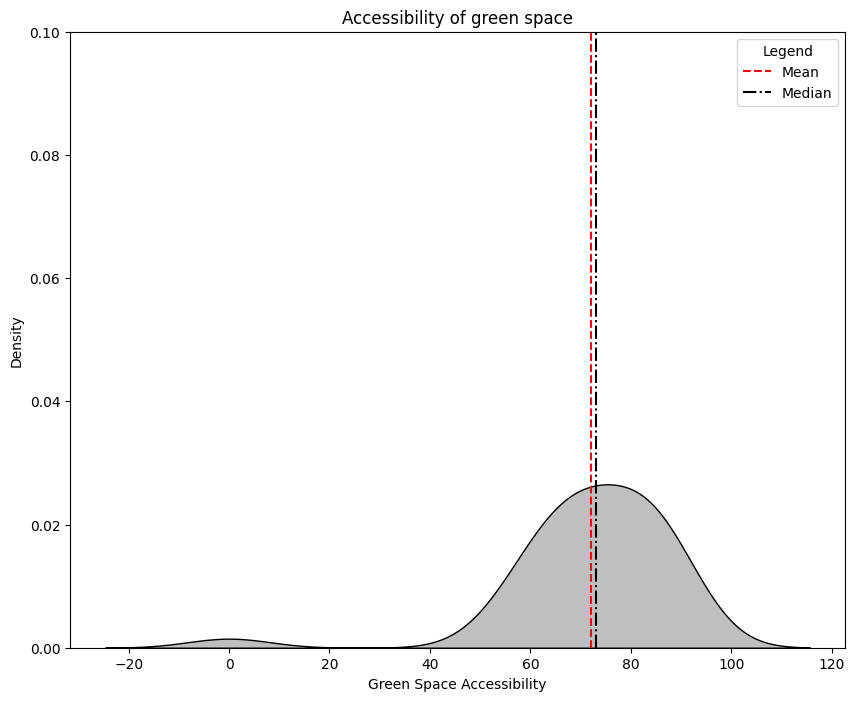

In [ ]:
fig, ax = plt.subplots(1, figsize=(10,8))
sns.kdeplot(df["meanpercent_homes_with_good_access"], ax=ax, color="black", shade=True)
plt.xlabel("Green Space Accessibility")
plt.vlines(df["meanpercent_homes_with_good_access"].mean(), 0, 0.65, linestyle="--", color="red", label="Mean")
plt.vlines(df["meanpercent_homes_with_good_access"].median(), 0, 0.65, linestyle="-.", color="black", label="Median")
plt.legend(title="Legend")
plt.title("Accessibility of green space")
plt.ylim(0,0.10)

plt.show()

### Availability

/var/folders/dc/9wj1x7k55tz37v935tbrs1x40000gn/T/ipykernel_95730/3281033251.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["percent_green"], ax=ax, color="black", shade=True)


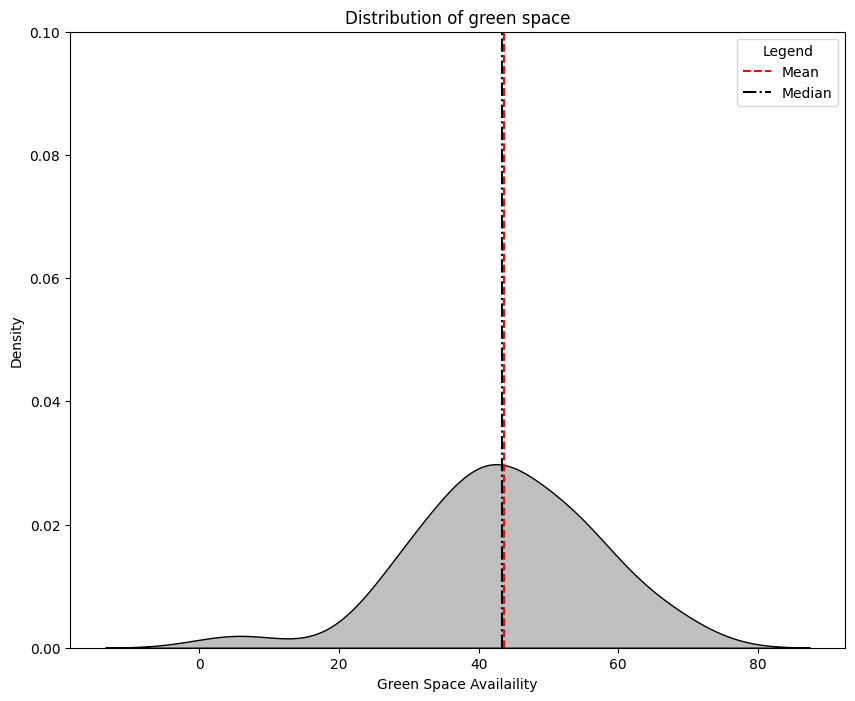

In [ ]:
fig, ax = plt.subplots(1, figsize=(10,8))
sns.kdeplot(df["percent_green"], ax=ax, color="black", shade=True)
plt.xlabel("Green Space Availaility")
plt.vlines(df["percent_green"].mean(), 0, 0.65, linestyle="--", color="red", label="Mean")
plt.vlines(df["percent_green"].median(), 0, 0.65, linestyle="-.", color="black", label="Median")
plt.legend(title="Legend")
plt.title("Distribution of green space")
plt.ylim(0,0.10)

plt.show()

### Green space pp

/var/folders/dc/9wj1x7k55tz37v935tbrs1x40000gn/T/ipykernel_15955/1570632855.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["green_pp"], ax=ax, color="black", shade=True)


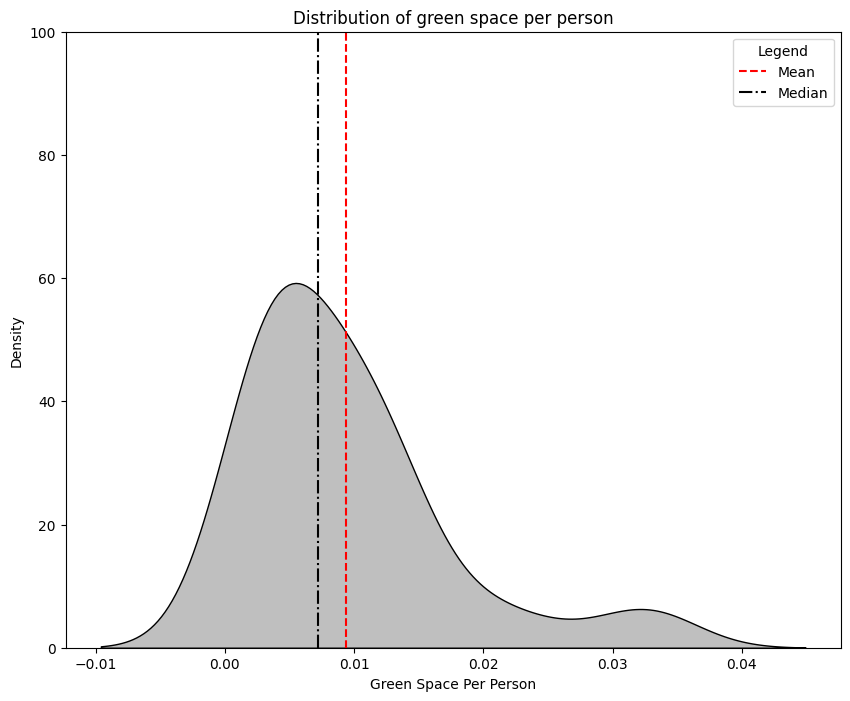

In [52]:
fig, ax = plt.subplots(1, figsize=(10,8))
sns.kdeplot(df["green_pp"], ax=ax, color="black", shade=True)
plt.xlabel("Green Space Per Person")
plt.vlines(df["green_pp"].mean(), 0, 100, linestyle="--", color="red", label="Mean")
plt.vlines(df["green_pp"].median(), 0, 100, linestyle="-.", color="black", label="Median")
plt.legend(title="Legend")
plt.title("Distribution of green space per person")
plt.ylim(0,100)

plt.show()

### Multi regression

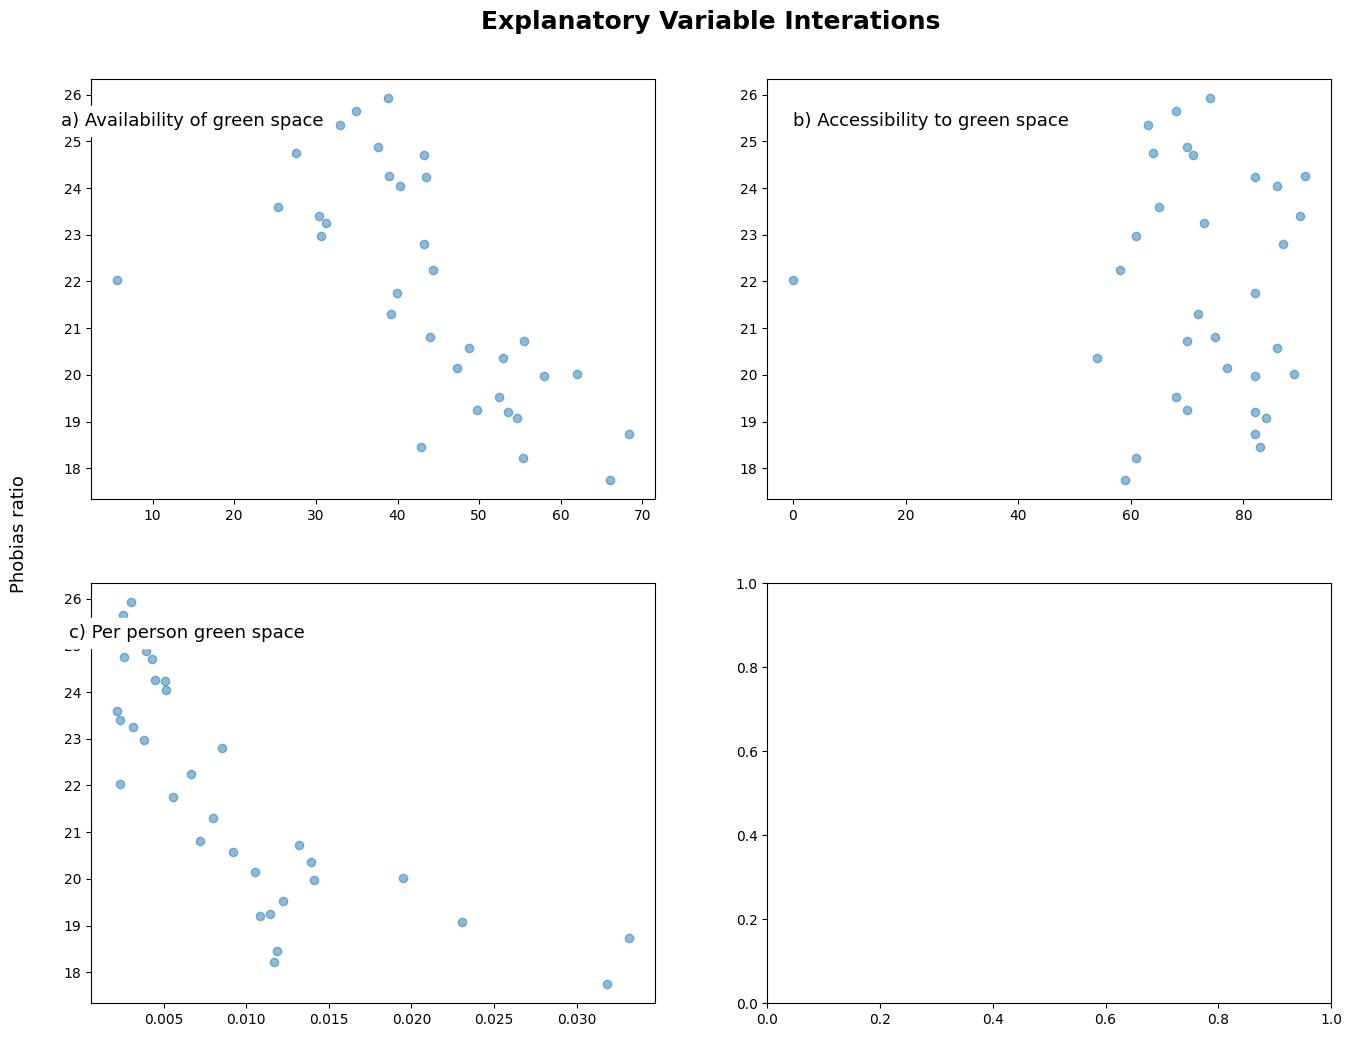

In [31]:
fig, axs = plt.subplots(2, 2, figsize=(16,12))

axs[0,0].scatter(x=df['percent_green'], 
            y=df['all_phobias_per1000'],
            alpha = 0.5)
axs[0,0].set_title("a) Availability of green space", y=0.87, x=0.18, backgroundcolor = "white", fontsize=13)

axs[0,1].scatter(x=df['meanpercent_homes_with_good_access'], 
            y=df['all_phobias_per1000'],
            alpha = 0.5)
axs[0,1].set_title("b) Accessibility to green space", y=0.87, x=0.29, backgroundcolor = "white", fontsize=13)

axs[1,0].scatter(x=df['green_pp'], 
            y=df['all_phobias_per1000'],
            alpha = 0.5)
axs[1,0].set_title("c) Per person green space", y=0.85, x=0.17, backgroundcolor = "white", fontsize=13)

#axs[1,1].scatter(x=df['all_phobias_per1000'], 
            #y=df['percent_green'],
            #alpha = 0.5)
#axs[1,1].annotate("d) Mental health (phobias per 1000)",(6, -2.2), backgroundcolor = "white", fontsize=13)


plt.title("Explanatory Variable Interations", fontweight="bold", y=2.3,x=-0.1, fontsize=18)
plt.suptitle("Phobias ratio", rotation=90, y=0.55, x=0.08, fontsize=13)


plt.show()

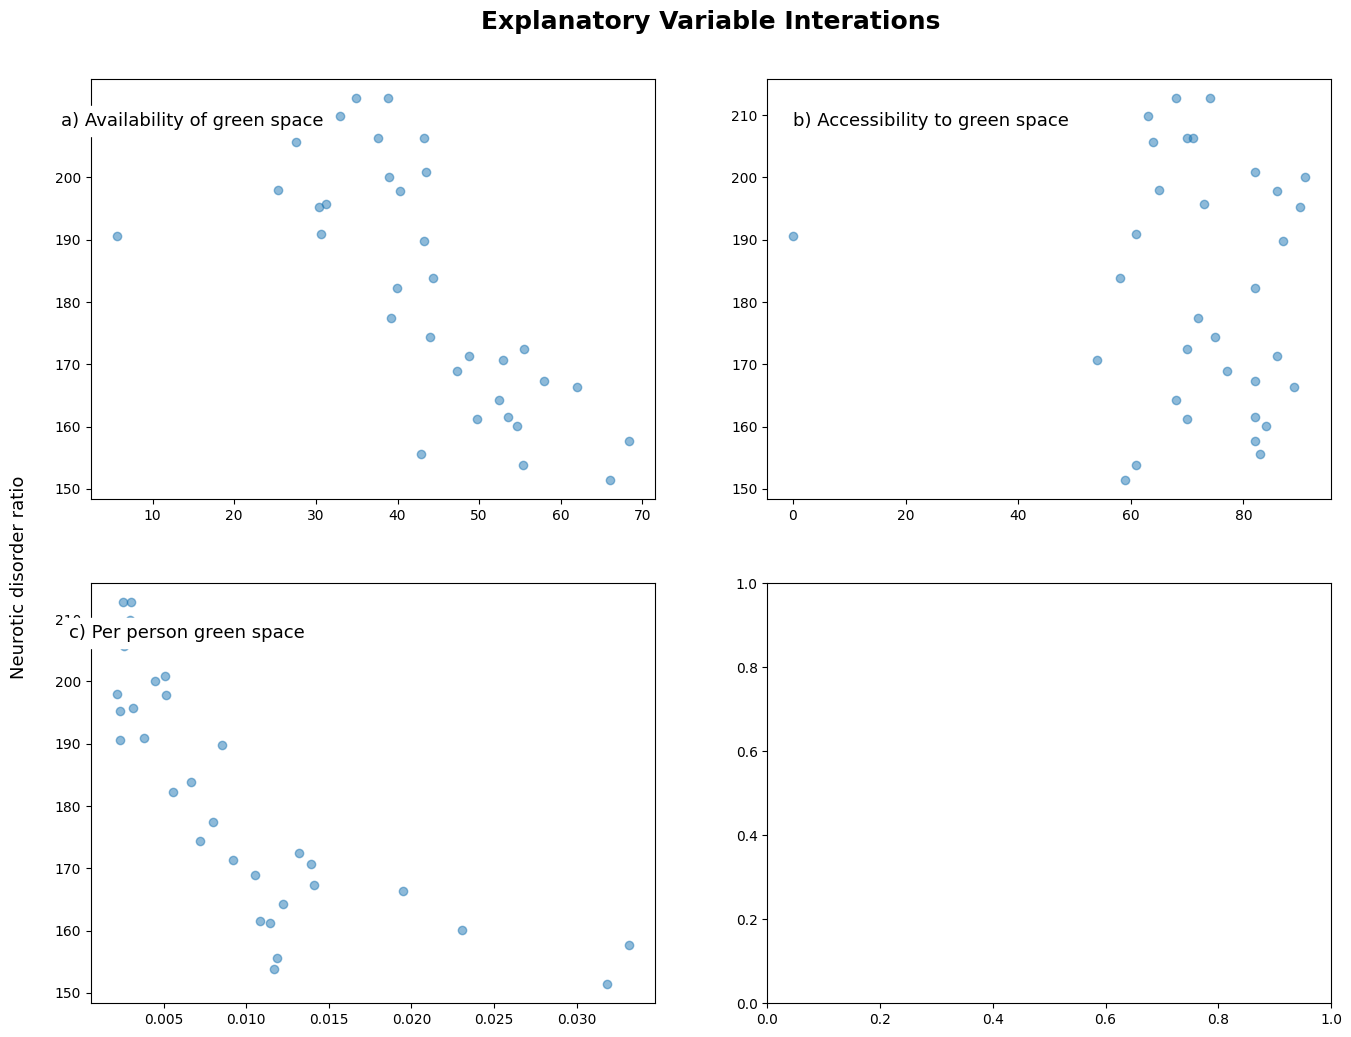

In [33]:
fig, axs = plt.subplots(2, 2, figsize=(16,12))

axs[0,0].scatter(x=df['percent_green'], 
            y=df['any_neurotic_disorder_per1000'],
            alpha = 0.5)
axs[0,0].set_title("a) Availability of green space", y=0.87, x=0.18, backgroundcolor = "white", fontsize=13)

axs[0,1].scatter(x=df['meanpercent_homes_with_good_access'], 
            y=df['any_neurotic_disorder_per1000'],
            alpha = 0.5)
axs[0,1].set_title("b) Accessibility to green space", y=0.87, x=0.29, backgroundcolor = "white", fontsize=13)

axs[1,0].scatter(x=df['green_pp'], 
            y=df['any_neurotic_disorder_per1000'],
            alpha = 0.5)
axs[1,0].set_title("c) Per person green space", y=0.85, x=0.17, backgroundcolor = "white", fontsize=13)

#axs[1,1].scatter(x=df['all_phobias_per1000'], 
            #y=df['percent_green'],
            #alpha = 0.5)
#axs[1,1].annotate("d) Mental health (phobias per 1000)",(6, -2.2), backgroundcolor = "white", fontsize=13)


plt.title("Explanatory Variable Interations", fontweight="bold", y=2.3,x=-0.1, fontsize=18)
plt.suptitle("Neurotic disorder ratio", rotation=90, y=0.55, x=0.08, fontsize=13)


plt.show()

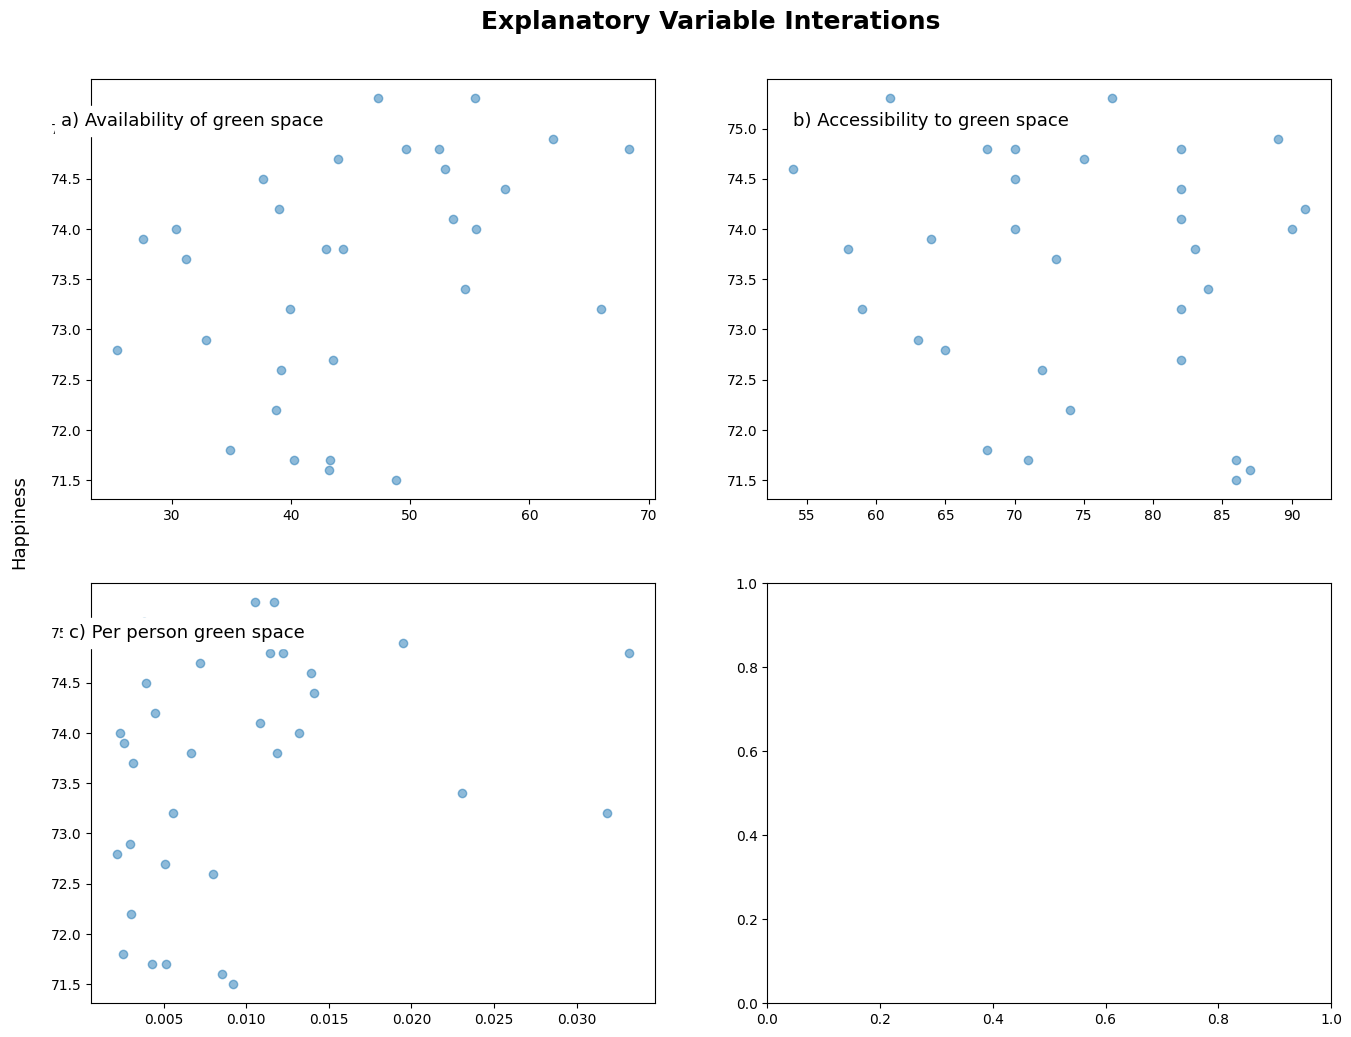

In [34]:
fig, axs = plt.subplots(2, 2, figsize=(16,12))

axs[0,0].scatter(x=df['percent_green'], 
            y=df['happiness'],
            alpha = 0.5)
axs[0,0].set_title("a) Availability of green space", y=0.87, x=0.18, backgroundcolor = "white", fontsize=13)

axs[0,1].scatter(x=df['meanpercent_homes_with_good_access'], 
            y=df['happiness'],
            alpha = 0.5)
axs[0,1].set_title("b) Accessibility to green space", y=0.87, x=0.29, backgroundcolor = "white", fontsize=13)

axs[1,0].scatter(x=df['green_pp'], 
            y=df['happiness'],
            alpha = 0.5)
axs[1,0].set_title("c) Per person green space", y=0.85, x=0.17, backgroundcolor = "white", fontsize=13)

#axs[1,1].scatter(x=df['all_phobias_per1000'], 
            #y=df['percent_green'],
            #alpha = 0.5)
#axs[1,1].annotate("d) Mental health (phobias per 1000)",(6, -2.2), backgroundcolor = "white", fontsize=13)


plt.title("Explanatory Variable Interations", fontweight="bold", y=2.3,x=-0.1, fontsize=18)
plt.suptitle("Happiness", rotation=90, y=0.55, x=0.08, fontsize=13)


plt.show()

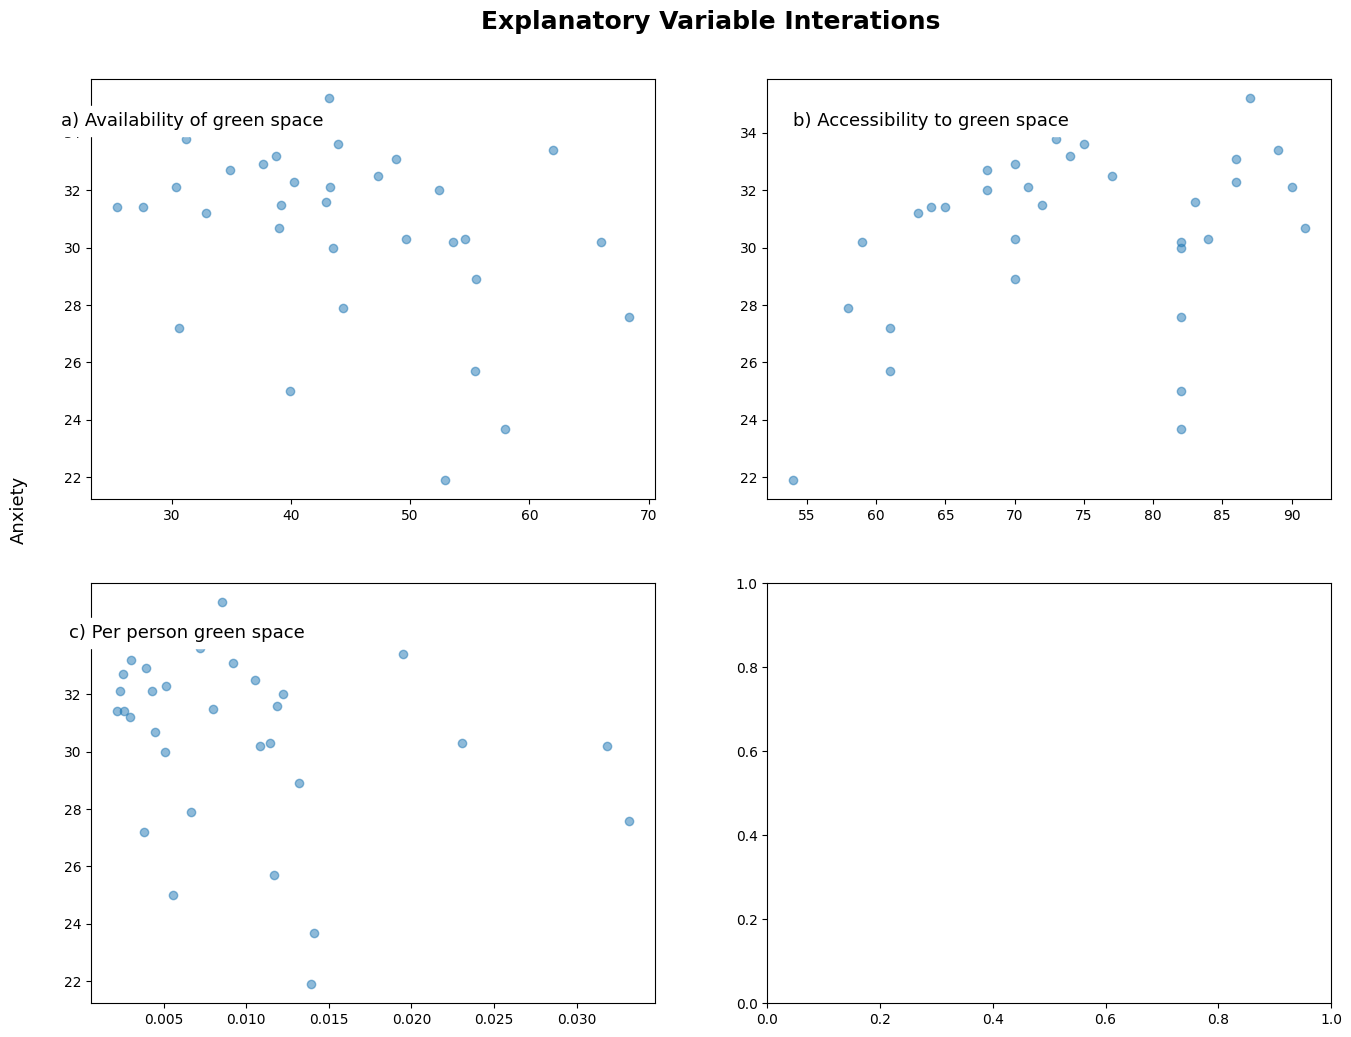

In [44]:
fig, axs = plt.subplots(2, 2, figsize=(16,12))

axs[0,0].scatter(x=df['percent_green'], 
            y=df['anxiety'],
            alpha = 0.5)
axs[0,0].set_title("a) Availability of green space", y=0.87, x=0.18, backgroundcolor = "white", fontsize=13)

axs[0,1].scatter(x=df['meanpercent_homes_with_good_access'], 
            y=df['anxiety'],
            alpha = 0.5)
axs[0,1].set_title("b) Accessibility to green space", y=0.87, x=0.29, backgroundcolor = "white", fontsize=13)

axs[1,0].scatter(x=df['green_pp'], 
            y=df['anxiety'],
            alpha = 0.5)
axs[1,0].set_title("c) Per person green space", y=0.85, x=0.17, backgroundcolor = "white", fontsize=13)

#axs[1,1].scatter(x=df['all_phobias_per1000'], 
            #y=df['percent_green'],
            #alpha = 0.5)
#axs[1,1].annotate("d) Mental health (phobias per 1000)",(6, -2.2), backgroundcolor = "white", fontsize=13)


plt.title("Explanatory Variable Interations", fontweight="bold", y=2.3,x=-0.1, fontsize=18)
plt.suptitle("Anxiety", rotation=90, y=0.55, x=0.08, fontsize=13)


plt.show()

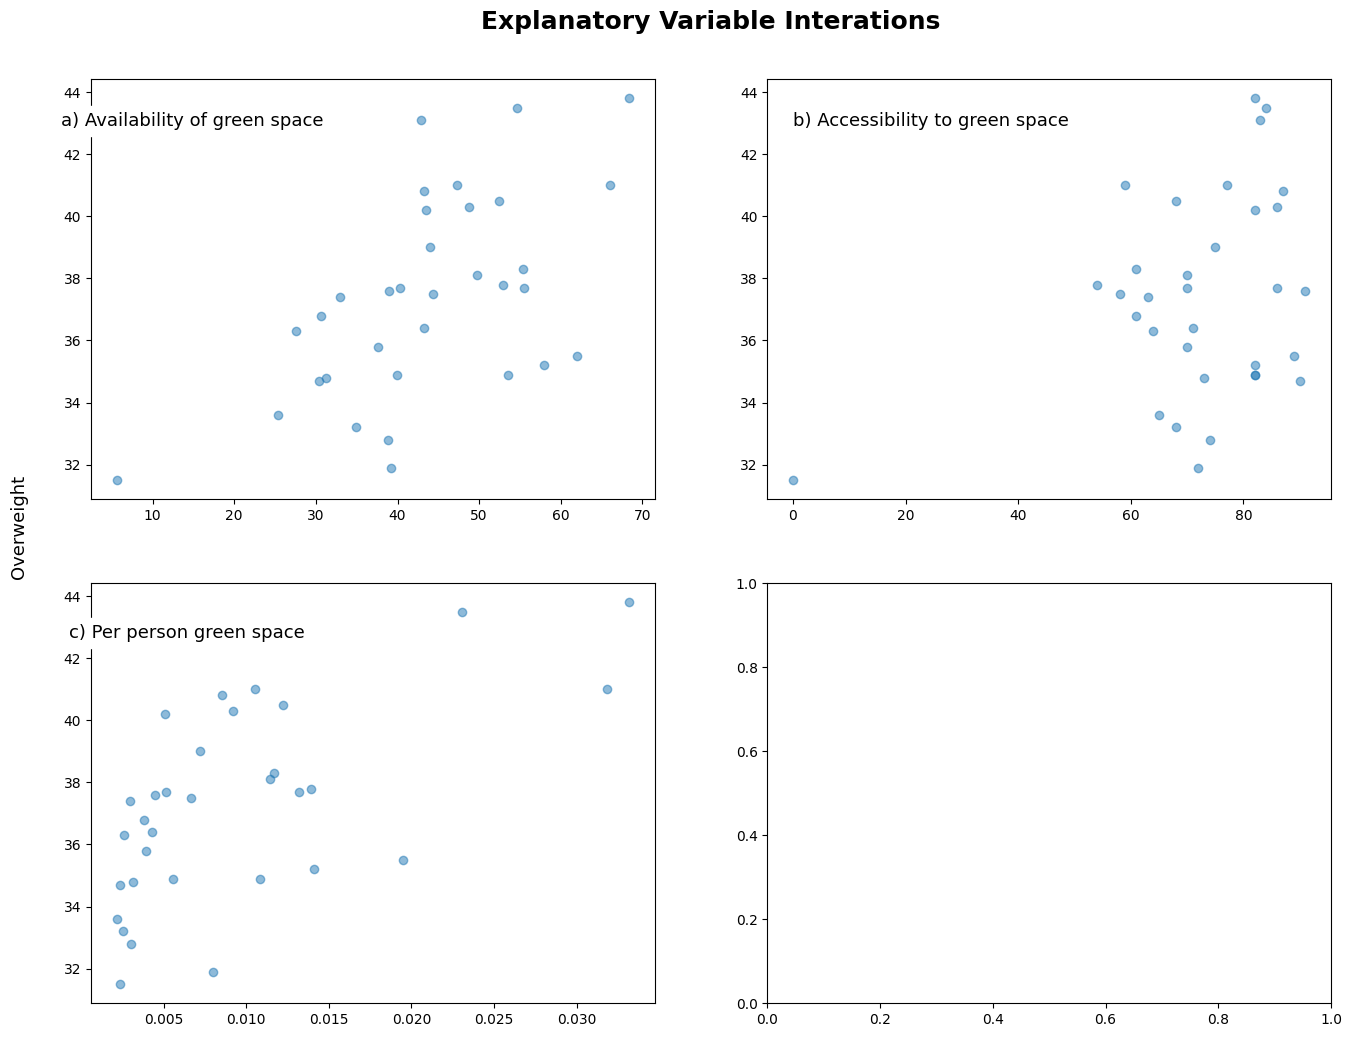

In [45]:
fig, axs = plt.subplots(2, 2, figsize=(16,12))

axs[0,0].scatter(x=df['percent_green'], 
            y=df['overweight'],
            alpha = 0.5)
axs[0,0].set_title("a) Availability of green space", y=0.87, x=0.18, backgroundcolor = "white", fontsize=13)

axs[0,1].scatter(x=df['meanpercent_homes_with_good_access'], 
            y=df['overweight'],
            alpha = 0.5)
axs[0,1].set_title("b) Accessibility to green space", y=0.87, x=0.29, backgroundcolor = "white", fontsize=13)

axs[1,0].scatter(x=df['green_pp'], 
            y=df['overweight'],
            alpha = 0.5)
axs[1,0].set_title("c) Per person green space", y=0.85, x=0.17, backgroundcolor = "white", fontsize=13)

#axs[1,1].scatter(x=df['all_phobias_per1000'], 
            #y=df['percent_green'],
            #alpha = 0.5)
#axs[1,1].annotate("d) Mental health (phobias per 1000)",(6, -2.2), backgroundcolor = "white", fontsize=13)


plt.title("Explanatory Variable Interations", fontweight="bold", y=2.3,x=-0.1, fontsize=18)
plt.suptitle("Overweight", rotation=90, y=0.55, x=0.08, fontsize=13)


plt.show()

In [20]:
from statsmodels.formula.api import ols

In [ ]:
df['death_persons']

0        28
1     1,266
2     2,349
3     1,896
4     1,612
5     2,631
6     1,060
7     2,408
8     1,889
9     2,004
10    1,590
11    1,045
12      846
13    1,173
14    1,453
15    2,193
16    1,864
17    1,372
18    1,003
19      785
20      972
21    1,378
22    1,536
23    1,213
24    1,264
25    1,657
26    1,110
27    1,357
28    1,569
29    1,062
30    1,473
31    1,442
32    1,083
Name: death_persons, dtype: object

In [ ]:
a=lambda x: str(x).split(',')
df['death_persons'].apply(a)
df['death_persons'].astype(str)

0        28
1     1,266
2     2,349
3     1,896
4     1,612
5     2,631
6     1,060
7     2,408
8     1,889
9     2,004
10    1,590
11    1,045
12      846
13    1,173
14    1,453
15    2,193
16    1,864
17    1,372
18    1,003
19      785
20      972
21    1,378
22    1,536
23    1,213
24    1,264
25    1,657
26    1,110
27    1,357
28    1,569
29    1,062
30    1,473
31    1,442
32    1,083
Name: death_persons, dtype: object

In [10]:
df['death_persons'] = df['death_persons'].str.replace(',', '').astype(float)

In [14]:
df['green_area_hectare']

0        17.61
1      1481.78
2      5030.91
3      2759.07
4      1726.56
5     10262.64
6       943.02
7      4802.84
8      2441.65
9      4352.73
10     2180.09
11      738.97
12      473.37
13     1288.89
14     2796.61
15     7551.97
16     6316.80
17     2677.23
18      518.14
19      376.07
20     1953.41
21      896.81
22     1421.51
23     1835.36
24     1182.08
25     3023.23
26     3642.68
27     1126.72
28     2178.83
29      547.61
30     1721.34
31     1373.92
32      687.28
33         NaN
Name: green_area_hectare, dtype: float64

In [16]:
df['population']

0       7,400
1     185,900
2     356,400
3     232,000
4     311,200
5     309,400
6     220,300
7     363,400
8     338,400
9     312,500
10    254,600
11    246,300
12    182,500
13    254,900
14    239,100
15    237,200
16    273,900
17    254,000
18    206,100
19    158,700
20    160,100
21    303,100
22    275,900
23    199,700
24    308,000
25    279,000
26    187,000
27    288,300
28    190,100
29    254,100
30    258,200
31    307,000
32    219,400
33        NaN
Name: population, dtype: object

In [40]:
df['population'] = df['population'].str.replace(',', '').astype(float)

In [41]:
df['green_pp'] = df['green_area_hectare']/df['population']

In [43]:
model_overweight = ols('overweight ~  percent_green + meanpercent_homes_with_good_access + green_pp ', df).fit()
model_overweight.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             overweight   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     7.532
Date:                Tue, 05 Dec 2023   Prob (F-statistic):           0.000714
Time:                        01:59:00   Log-Likelihood:                -75.642
No. Observations:                  33   AIC:                             159.3
Df Residuals:                      29   BIC:                             165.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             31.6783      2.251     14.075      0.000      27.075      36.282
percent_green                         -0.0106      0.079     -0.135      0.893      -0.171       0.150
meanpercent_homes_with_good_access     0.0531      0.035      1.522      0.139      -0.018       0.125
green_pp                             248.3725    114.200      2.175      0.038      14.808     481.938
==============================================================================
Omnibus:                        1.188   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.552   Jarque-Bera (JB):                1.166
Skew:                          -0.388   Prob(JB):                        0.558
Kurtosis:                       2.505   Cond. No.                     2.21e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.21e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
model_phobias = ols('all_phobias_per1000 ~  percent_green + meanpercent_homes_with_good_access + green_pp ', df).fit()
model_phobias.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     all_phobias_per1000   R-squared:                       0.621
Model:                             OLS   Adj. R-squared:                  0.582
Method:                  Least Squares   F-statistic:                     15.85
Date:                 Tue, 05 Dec 2023   Prob (F-statistic):           2.73e-06
Time:                         01:25:43   Log-Likelihood:                -59.627
No. Observations:                   33   AIC:                             127.3
Df Residuals:                       29   BIC:                             133.2
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             23.8924      1.385     17.246      0.000      21.059      26.726
percent_green                         -0.0612      0.048     -1.264      0.216      -0.160       0.038
meanpercent_homes_with_good_access     0.0298      0.021      1.387      0.176      -0.014       0.074
green_pp                            -165.4614     70.292     -2.354      0.026    -309.225     -21.698
==============================================================================
Omnibus:                        0.988   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.610   Jarque-Bera (JB):                0.825
Skew:                          -0.036   Prob(JB):                        0.662
Kurtosis:                       2.229   Cond. No.                     2.21e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.21e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
model_neuro = ols('any_neurotic_disorder_per1000 ~  percent_green + meanpercent_homes_with_good_access + green_pp', df).fit()
model_neuro.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     any_neurotic_disorder_per1000   R-squared:                       0.638
Model:                                       OLS   Adj. R-squared:                  0.601
Method:                            Least Squares   F-statistic:                     17.05
Date:                           Tue, 05 Dec 2023   Prob (F-statistic):           1.42e-06
Time:                                   01:25:54   Log-Likelihood:                -127.17
No. Observations:                             33   AIC:                             262.3
Df Residuals:                                 29   BIC:                             268.3
Df Model:                                      3                                         
Covariance Type:                       nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                            204.6220     10.726     19.077      0.000     182.685     226.559
percent_green                         -0.5851      0.375     -1.562      0.129      -1.352       0.181
meanpercent_homes_with_good_access     0.1982      0.166      1.191      0.243      -0.142       0.538
green_pp                           -1185.6869    544.217     -2.179      0.038   -2298.736     -72.637
==============================================================================
Omnibus:                        0.678   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.712   Jarque-Bera (JB):                0.690
Skew:                          -0.032   Prob(JB):                        0.708
Kurtosis:                       2.295   Cond. No.                     2.21e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.21e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
model_mortality = ols('death_persons ~  percent_green + meanpercent_homes_with_good_access + green_pp ', df).fit()
model_mortality.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          death_persons   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     14.46
Date:                Tue, 05 Dec 2023   Prob (F-statistic):           6.06e-06
Time:                        01:26:03   Log-Likelihood:                -237.97
No. Observations:                  33   AIC:                             483.9
Df Residuals:                      29   BIC:                             489.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                            125.0874    308.056      0.406      0.688    -504.959     755.133
percent_green                         20.6615     10.762      1.920      0.065      -1.349      42.672
meanpercent_homes_with_good_access     3.5810      4.778      0.749      0.460      -6.191      13.353
green_pp                            1.675e+04   1.56e+04      1.071      0.293   -1.52e+04    4.87e+04
==============================================================================
Omnibus:                        3.692   Durbin-Watson:                   1.624
Prob(Omnibus):                  0.158   Jarque-Bera (JB):                2.273
Skew:                          -0.532   Prob(JB):                        0.321
Kurtosis:                       3.723   Cond. No.                     2.21e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.21e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
model_life_fe = ols('life_expectancy_birth_females ~  percent_green + meanpercent_homes_with_good_access ', df).fit()
model_life_fe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     life_expectancy_birth_females   R-squared:                       0.125
Model:                                       OLS   Adj. R-squared:                  0.064
Method:                            Least Squares   F-statistic:                     2.068
Date:                           Mon, 04 Dec 2023   Prob (F-statistic):              0.145
Time:                                   23:46:52   Log-Likelihood:                -47.253
No. Observations:                             32   AIC:                             100.5
Df Residuals:                                 29   BIC:                             104.9
Df Model:                                      2                                         
Covariance Type:                       nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             81.2037      1.584     51.253      0.000      77.963      84.444
percent_green                          0.0295      0.018      1.617      0.117      -0.008       0.067
meanpercent_homes_with_good_access     0.0204      0.019      1.063      0.297      -0.019       0.060
==============================================================================
Omnibus:                        4.646   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.098   Jarque-Bera (JB):                3.275
Skew:                           0.752   Prob(JB):                        0.195
Kurtosis:                       3.441   Cond. No.                         705.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
model_life_m = ols('life_expectancy_birth_males ~  percent_green + meanpercent_homes_with_good_access + green_pp', df).fit()
model_life_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     life_expectancy_birth_males   R-squared:                       0.240
Model:                                     OLS   Adj. R-squared:                  0.158
Method:                          Least Squares   F-statistic:                     2.944
Date:                         Tue, 05 Dec 2023   Prob (F-statistic):             0.0501
Time:                                 01:26:11   Log-Likelihood:                -50.574
No. Observations:                           32   AIC:                             109.1
Df Residuals:                               28   BIC:                             115.0
Df Model:                                    3                                         
Covariance Type:                     nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             75.0986      2.065     36.363      0.000      70.868      79.329
percent_green                          0.0765      0.044      1.725      0.096      -0.014       0.167
meanpercent_homes_with_good_access     0.0275      0.022      1.265      0.216      -0.017       0.072
green_pp                             -41.5450     61.514     -0.675      0.505    -167.551      84.461
==============================================================================
Omnibus:                       11.169   Durbin-Watson:                   1.841
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               10.531
Skew:                           1.104   Prob(JB):                      0.00517
Kurtosis:                       4.738   Cond. No.                     2.42e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
model_happiness = ols('happiness ~  percent_green + meanpercent_homes_with_good_access + green_pp ', df).fit()
model_happiness.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              happiness   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     1.559
Date:                Tue, 05 Dec 2023   Prob (F-statistic):              0.221
Time:                        01:26:21   Log-Likelihood:                -47.632
No. Observations:                  32   AIC:                             103.3
Df Residuals:                      28   BIC:                             109.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             73.9865      1.884     39.275      0.000      70.128      77.845
percent_green                          0.0289      0.040      0.716      0.480      -0.054       0.112
meanpercent_homes_with_good_access    -0.0237      0.020     -1.191      0.243      -0.064       0.017
green_pp                              10.5252     56.110      0.188      0.853    -104.411     125.462
==============================================================================
Omnibus:                        4.214   Durbin-Watson:                   2.143
Prob(Omnibus):                  0.122   Jarque-Bera (JB):                2.194
Skew:                          -0.373   Prob(JB):                        0.334
Kurtosis:                       1.956   Cond. No.                     2.42e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
model_anxiety = ols('anxiety ~  percent_green + meanpercent_homes_with_good_access + green_pp ', df).fit()
model_anxiety.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                anxiety   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     3.217
Date:                Tue, 05 Dec 2023   Prob (F-statistic):             0.0378
Time:                        01:26:32   Log-Likelihood:                -76.328
No. Observations:                  32   AIC:                             160.7
Df Residuals:                      28   BIC:                             166.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             28.0380      4.618      6.071      0.000      18.578      37.498
percent_green                         -0.1483      0.099     -1.497      0.146      -0.351       0.055
meanpercent_homes_with_good_access     0.1133      0.049      2.328      0.027       0.014       0.213
green_pp                              69.5574    137.562      0.506      0.617    -212.225     351.340
==============================================================================
Omnibus:                        6.047   Durbin-Watson:                   2.217
Prob(Omnibus):                  0.049   Jarque-Bera (JB):                4.833
Skew:                          -0.938   Prob(JB):                       0.0892
Kurtosis:                       3.324   Cond. No.                     2.42e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""